In [76]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import vector
import matplotlib.pyplot as plt

raw_file = "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/h5py_data/ttbar_h5py_raw_test.h5"
with h5py.File(raw_file, "r") as f:
    tops =  f["targets"][()]
    event_data = f["event"][()]

In [77]:
event_selection = (event_data[:, 2] == 1)
tops_event_selection = tops[event_selection]
top_quarks = (abs(tops_event_selection[..., 4]) == 6)
tops = tops_event_selection[top_quarks].reshape(-1,  2, 5)


In [78]:
v = vector.array({
    "pt": tops[..., 0],
    "eta": tops[..., 1],
        "phi": tops[..., 2],
        "mass":  tops[..., 3],
})

In [79]:
v.to_ptphietaenergy()
combined = (v[:, 0] + v[: , 1]).M

In [80]:
test_dataset = np.log(1 + combined)
test_dataset = (test_dataset - mean) / std

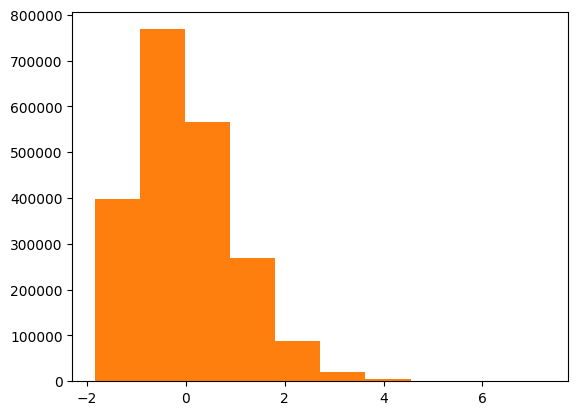

In [63]:
log10combined = np.log(1 + combined)
log10max = np.max(log10combined)
log10min = np.min(log10combined)

log10minmaxed = (log10combined - log10min) / (log10max - log10min)

plt.hist((log10minmaxed - np.mean(log10minmaxed)) / np.std(log10minmaxed))

plt.hist((log10combined - np.mean(log10combined)) / np.std(log10combined))

train_dataset = (log10combined - np.mean(log10combined)) / np.std(log10combined)

(array([2.35576960e-01, 4.01097162e-01, 3.40953741e-01, 2.09450003e-01,
        9.88593352e-02, 3.65891478e-02, 1.12282947e-02, 2.73275285e-03,
        6.51743987e-04, 1.94379910e-04]),
 array([-1.70383477, -0.95607811, -0.20832148,  0.53943515,  1.28719187,
         2.03494835,  2.78270507,  3.53046179,  4.27821827,  5.02597523,
         5.77373171]),
 <BarContainer object of 10 artists>)

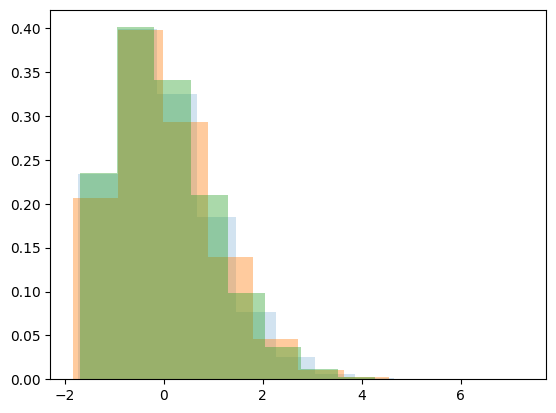

In [81]:
plt.hist(val_dataset, alpha = 0.2, density= True)
plt.hist(train_dataset, alpha = 0.4, density= True)
plt.hist(test_dataset,  alpha = 0.4, density= True)

In [64]:
mean = np.mean(log10combined)
std = np.std(log10combined)

In [82]:
with h5py.File("/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/processed_data_interaction_with_W/ttbar_preprocessed_test.h5", "a") as f:
        f.create_dataset("invariant_mass", dtype = "float32",
                         shape = (len(test_dataset), 1))
        f["invariant_mass"][()] = test_dataset.reshape(-1, 1)

In [91]:
with h5py.File("/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/processed_data_interaction_with_W/invariant_mass_scalers.h5", "w") as f:
    f.create_dataset("mean", shape = (1))
    f.create_dataset("std", shape = (1))
    f["mean"][()] = mean
    f["std"][()] = std
    print(mean)
    print(std)

6.352097
0.30358553
